In [66]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 


#Read the Data

df = pd.read_csv(r'C:\Users\Faarouk\Desktop\movies.csv')

In [67]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [68]:
#check if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [69]:
#Count null values in each column

print(df.isnull().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [70]:
#handle missing values

df['budget'].fillna(df['budget'].median(), inplace=True)
df['gross'].fillna(df['gross'].median(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].median(), inplace=True)

df['released'].fillna(df['year'].astype(str), inplace=True)


print(df.isnull().sum())

name         0
rating      77
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64


In [71]:
#the rest of the missing data replaced with unknown

df.fillna("Unknown", inplace=True)

print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [72]:
#Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [73]:
#change data type of coulumns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [74]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [75]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [76]:
pd.set_option('display.max_rows', None)

In [77]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [78]:
#Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()
#df.drop_duplicates()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

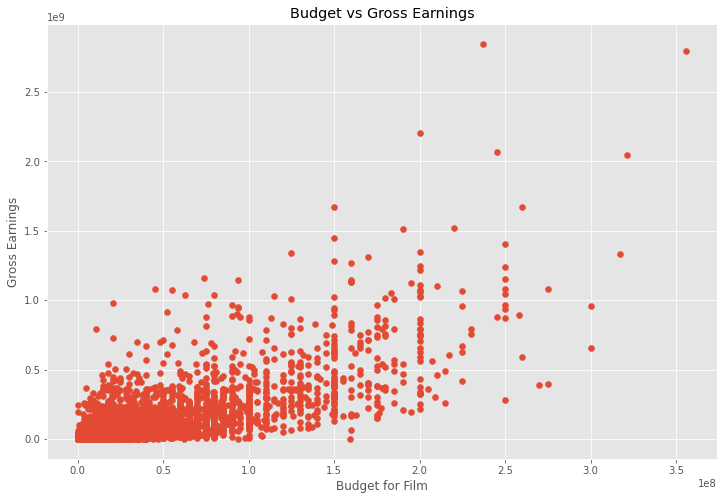

In [79]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

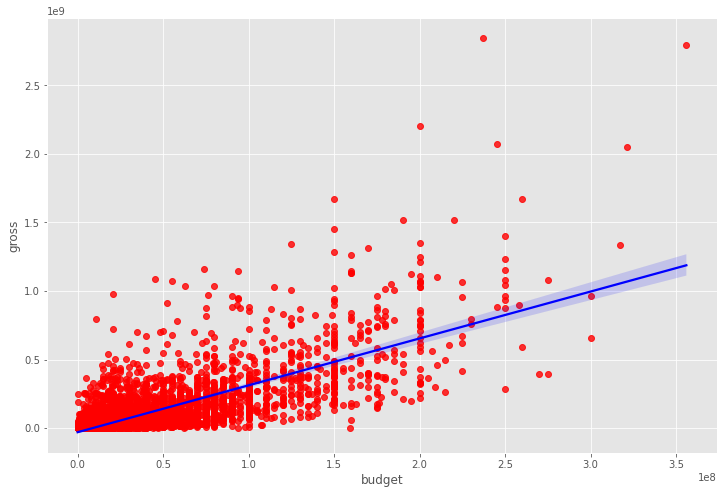

In [80]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [55]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120766
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399335
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309138
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273345
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244353
runtime,0.120766,0.399335,0.309138,0.273345,0.244353,1.000000


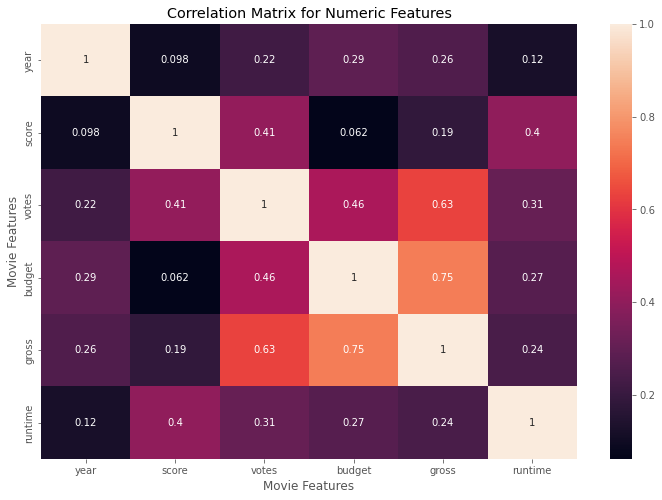

In [57]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [81]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,697,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,535,5,0,2019,184,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6896,5,6,1997,705,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,5144,5,0,2015,699,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,193,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


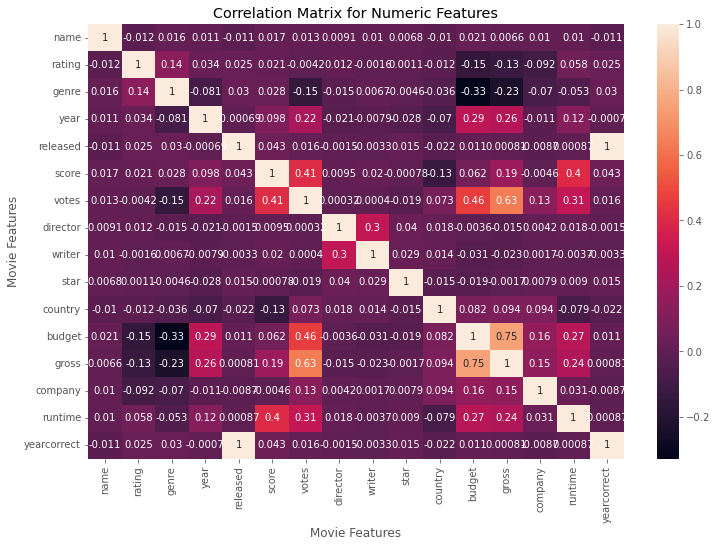

In [61]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [62]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012206,0.016355,0.011453,-0.011309,0.017105,0.013056,0.009079,0.009985,0.006844,-0.010359,0.020921,0.006601,0.010373,0.010390,-0.011311
rating,-0.012206,1.000000,0.136127,0.033801,0.025001,0.021087,-0.004217,0.011951,-0.001610,0.001063,-0.011793,-0.149686,-0.130747,-0.092284,0.058132,0.025001
genre,0.016355,0.136127,1.000000,-0.081261,0.029822,0.027965,-0.145291,-0.015258,0.006747,-0.004641,-0.035783,-0.328484,-0.233385,-0.070032,-0.052699,0.029822
year,0.011453,0.033801,-0.081261,1.000000,-0.000692,0.098013,0.222573,-0.020795,-0.007930,-0.027912,-0.069590,0.291690,0.259504,-0.011425,0.120766,-0.000695
released,-0.011309,0.025001,0.029822,-0.000692,1.000000,0.042823,0.015960,-0.001478,-0.003327,0.015447,-0.022159,0.011120,0.000806,-0.008719,0.000868,1.000000
score,0.017105,0.021087,0.027965,0.098013,0.042823,1.000000,0.409157,0.009540,0.019738,-0.000781,-0.134427,0.061931,0.185563,-0.004560,0.399335,0.042824
votes,0.013056,-0.004217,-0.145291,0.222573,0.015960,0.409157,1.000000,0.000316,0.000399,-0.019429,0.073461,0.460968,0.632120,0.130583,0.309138,0.015959
director,0.009079,0.011951,-0.015258,-0.020795,-0.001478,0.009540,0.000316,1.000000,0.299523,0.039875,0.018014,-0.003584,-0.014758,0.004248,0.017624,-0.001478
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003327,0.019738,0.000399,0.299523,1.000000,0.028887,0.014490,-0.031041,-0.023034,0.001729,-0.003692,-0.003326
star,0.006844,0.001063,-0.004641,-0.027912,0.015447,-0.000781,-0.019429,0.039875,0.028887,1.000000,-0.015101,-0.018902,-0.001675,0.007918,0.008957,0.015446


In [63]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.012206
             genre          0.016355
             year           0.011453
             released      -0.011309
             score          0.017105
             votes          0.013056
             director       0.009079
             writer         0.009985
             star           0.006844
             country       -0.010359
             budget         0.020921
             gross          0.006601
             company        0.010373
             runtime        0.010390
             yearcorrect   -0.011311
rating       name          -0.012206
             rating         1.000000
             genre          0.136127
             year           0.033801
             released       0.025001
             score          0.021087
             votes         -0.004217
             director       0.011951
             writer        -0.001610
             star           0.001063
             country       -0.011793
 

In [64]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.328484
genre        budget        -0.328484
gross        genre         -0.233385
genre        gross         -0.233385
rating       budget        -0.149686
budget       rating        -0.149686
votes        genre         -0.145291
genre        votes         -0.145291
country      score         -0.134427
score        country       -0.134427
rating       gross         -0.130747
gross        rating        -0.130747
rating       company       -0.092284
company      rating        -0.092284
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.079188
runtime      country       -0.079188
company      genre         -0.070032
genre        company       -0.070032
country      year          -0.069590
year         country       -0.069590
genre        runtime       -0.052699
runtime      genre         -0.052699
country      genre         -0.035783
genre        country       -0.035783
budget       writer        -0.031041
w

In [65]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632120
gross        votes          0.632120
budget       gross          0.745881
gross        budget         0.745881
released     yearcorrect    1.000000
yearcorrect  released       1.000000
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Company has low correlation
#budget has high correlation